# Goal

#### 1. Predict cost on media campaings in food mart of USA on the basis of the 60k customers income,product,promotion and store features.

#### 2. Explore the important factors that affect the cost on media campaings
#### 3.Train a machine learning model on the cleaned and feature-selected data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df=pd.read_csv("C:\\Users\\USER\\DA\\Data Sets\\PROJECT DATASETS\\media prediction and its cost.csv")
df

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [4]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [5]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [4]:
df.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

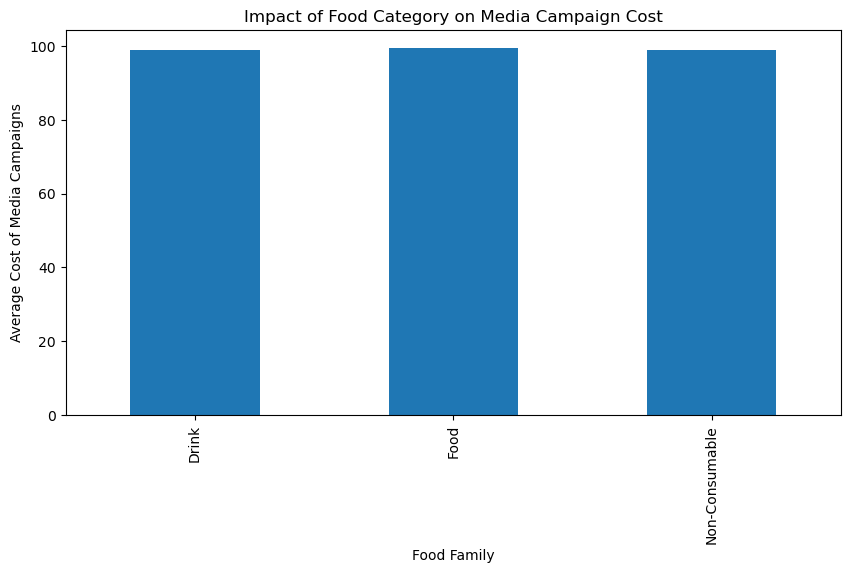

In [7]:
grouped = df.groupby("food_family").mean()["cost"]
grouped.plot(kind="bar", x="food_family", y="cost", figsize=(10,5))
plt.xlabel("Food Family")
plt.ylabel("Average Cost of Media Campaigns")
plt.title("Impact of Food Category on Media Campaign Cost")
plt.show()

It is possible to verify that the difference is very small and probably the characteristics of the product do not affect the campaign costs.

### Can promotions offered have a significant impact on the cost of media campaigns?

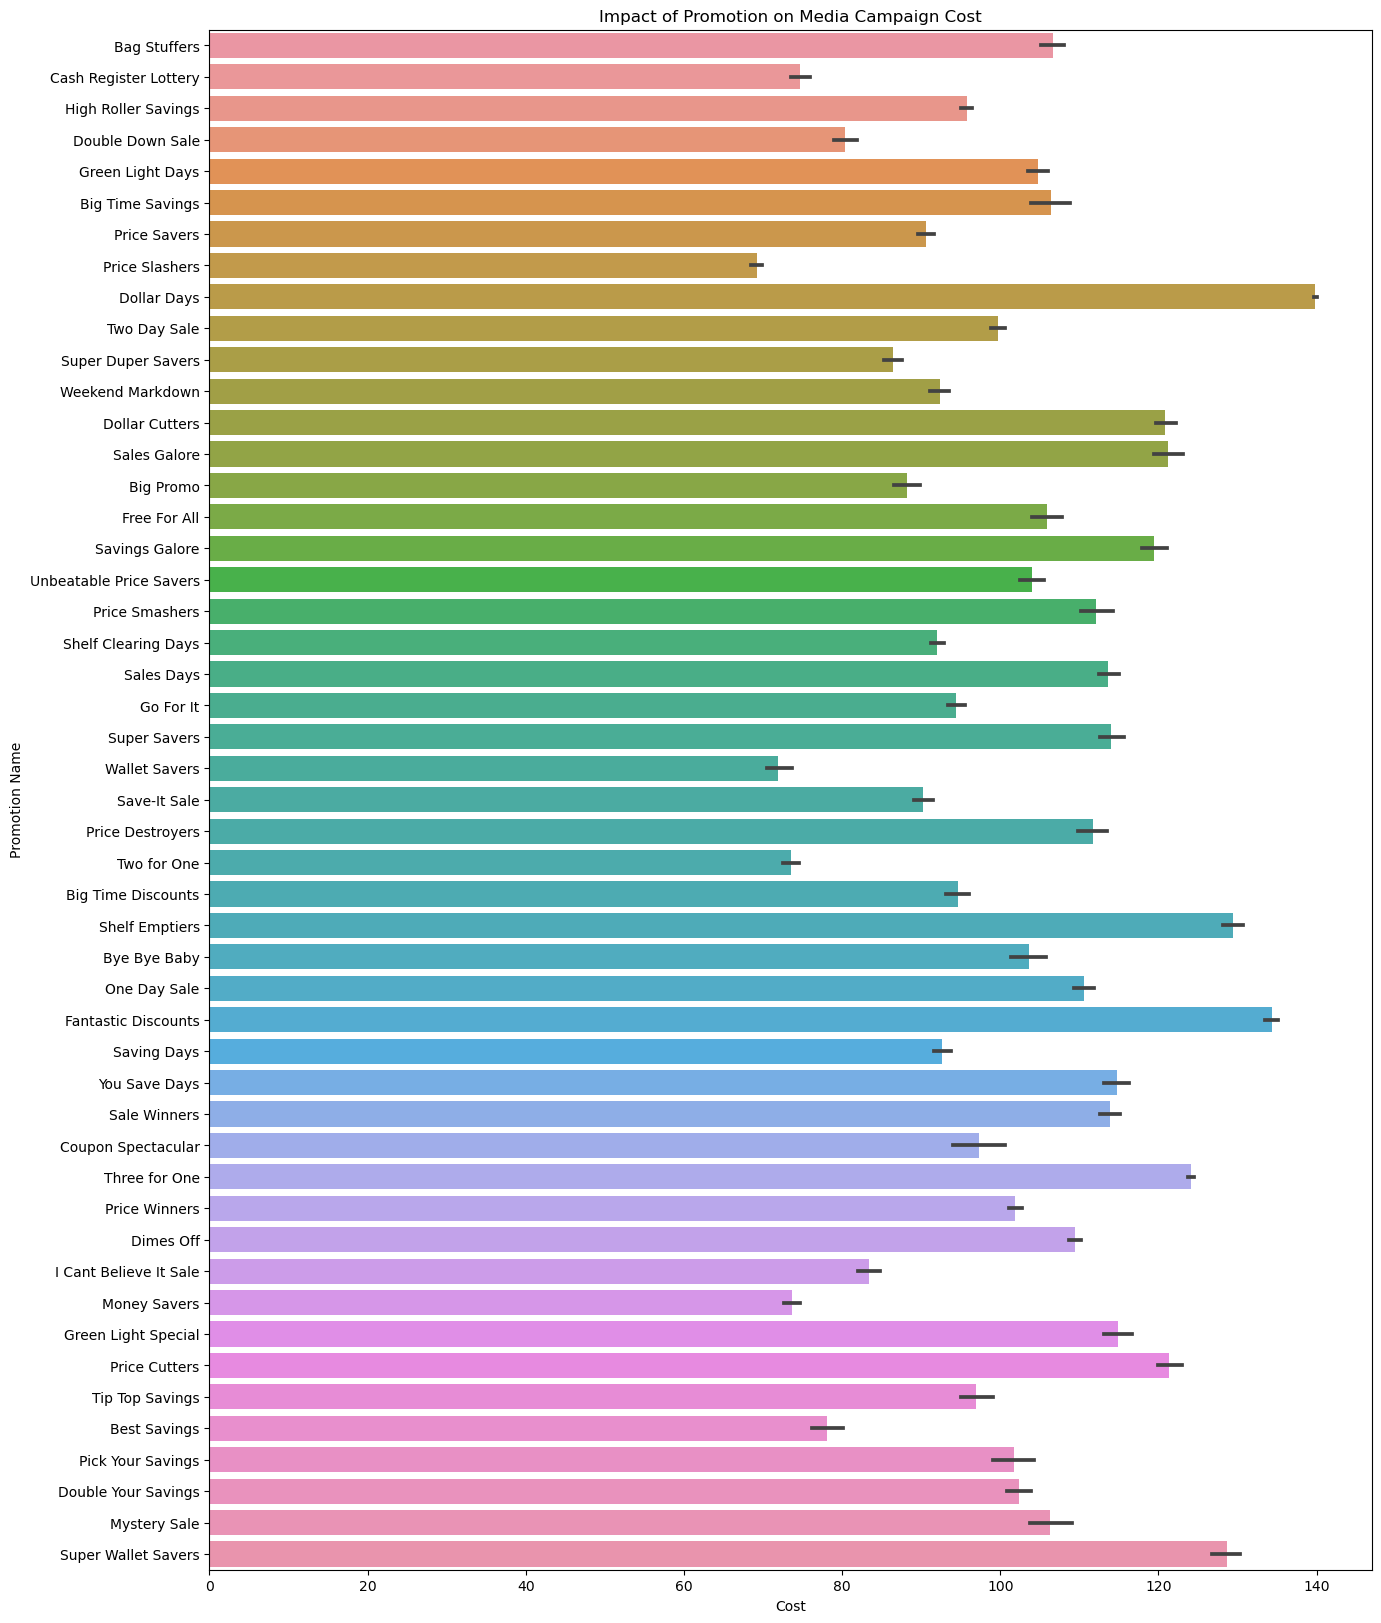

In [10]:
plt.figure(figsize=(15,20))
sns.barplot(x='cost', y='promotion_name', data=df)
plt.title("Impact of Promotion on Media Campaign Cost")
plt.xlabel("Cost")
plt.ylabel("Promotion Name")
plt.show()


By Visualizing the graph, it can be concluded that some promotions have a much higher cost than others. In addition, you can compare the average cost for different promotions and evaluate the cost effectiveness of media campaigns.

The chart also confirms that promotions can significantly affect the cost of campaigns.


In [5]:
df["num_children_at_home"].unique()

array([1., 0., 2., 3., 5., 4.])

In [6]:
df["num_children_at_home"]=df["num_children_at_home"].astype(str)

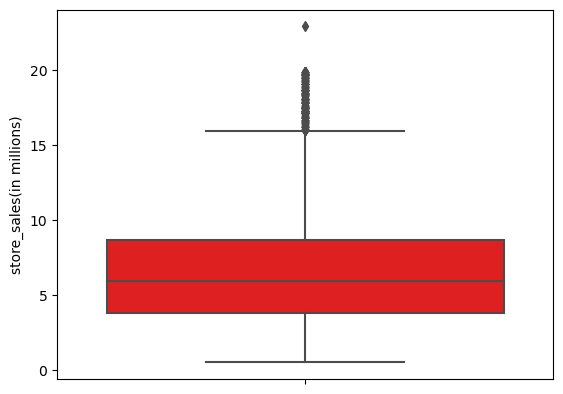

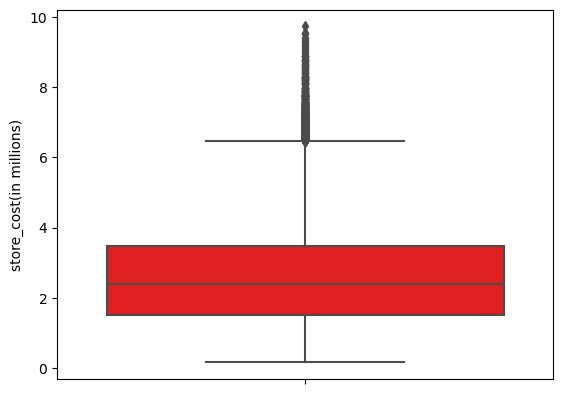

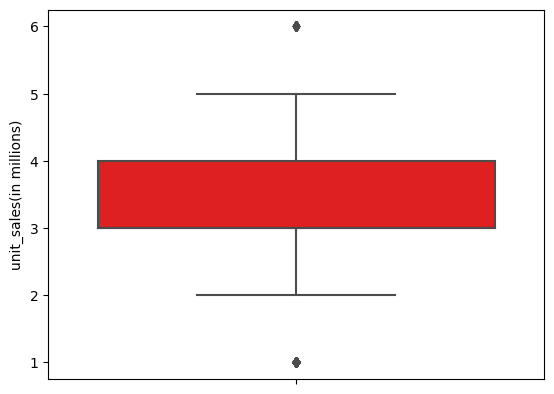

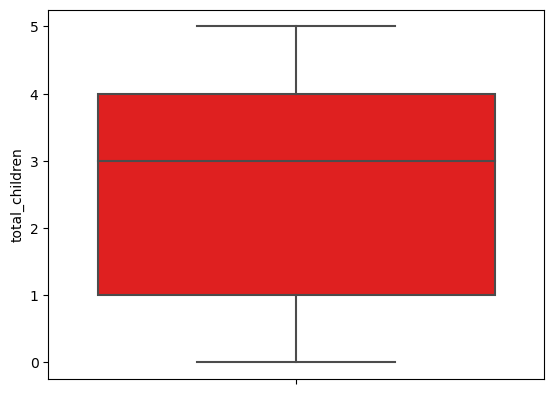

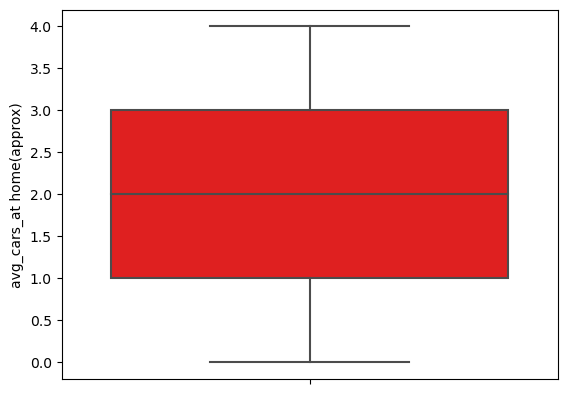

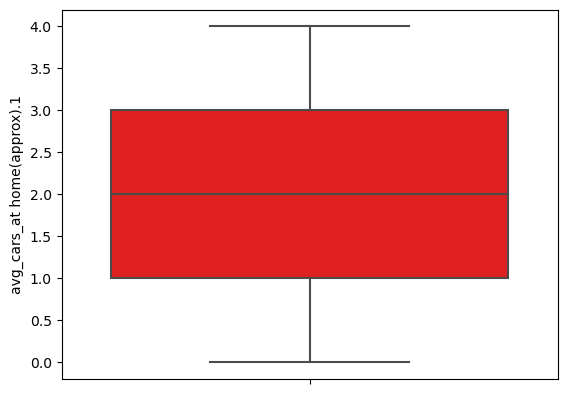

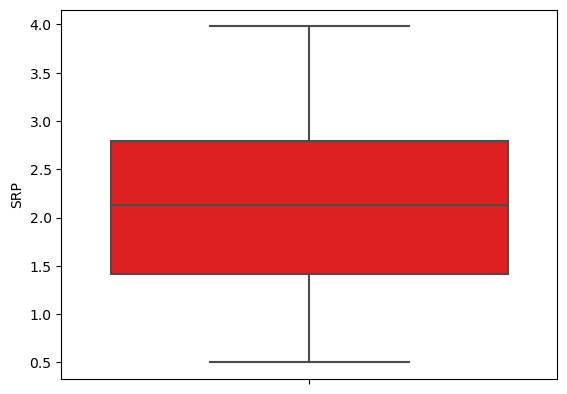

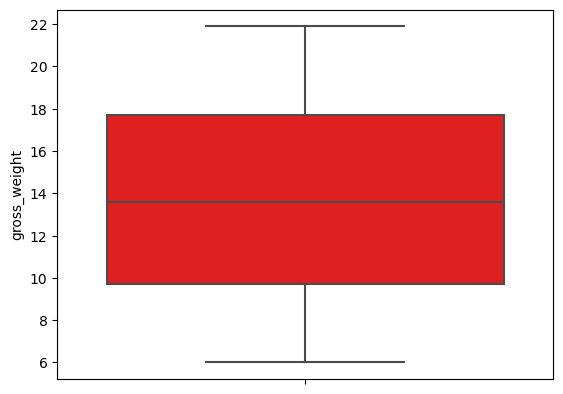

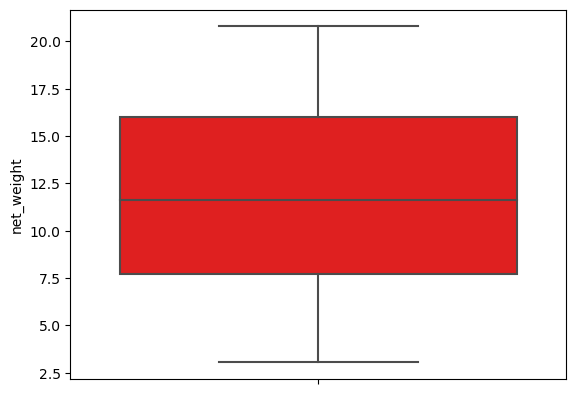

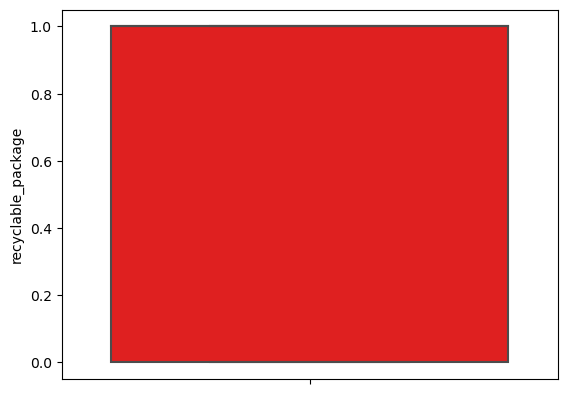

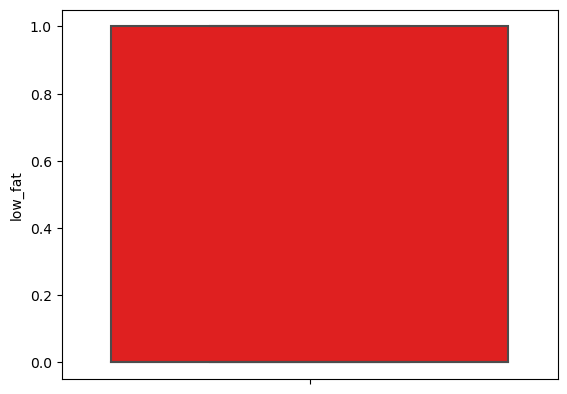

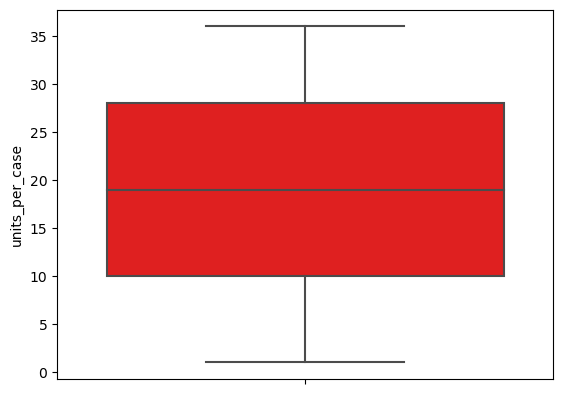

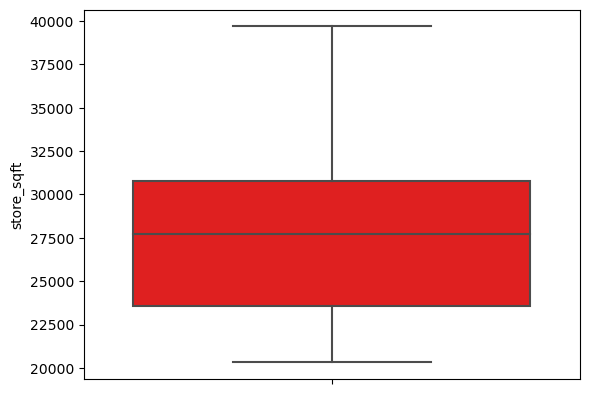

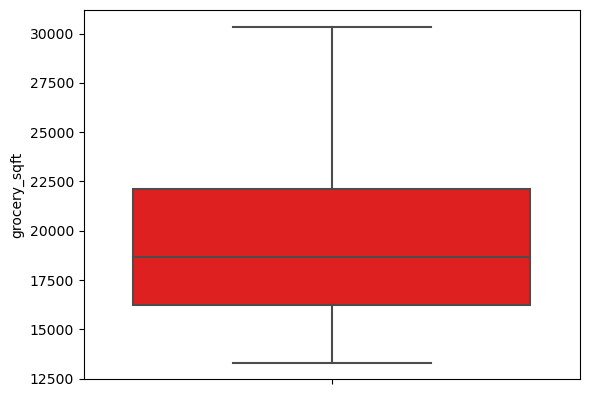

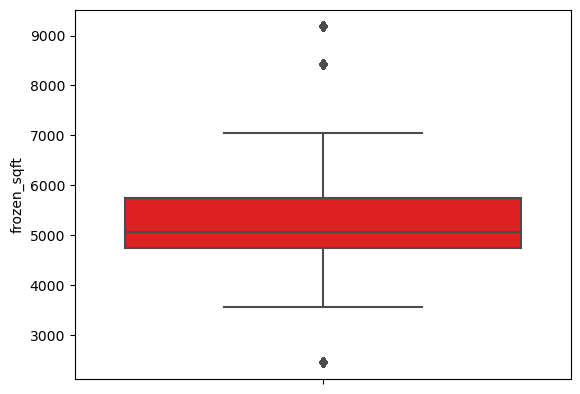

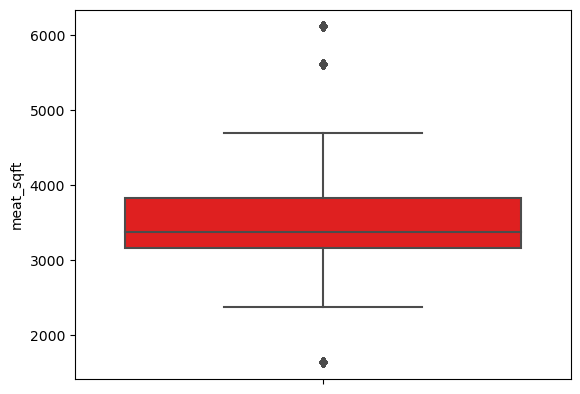

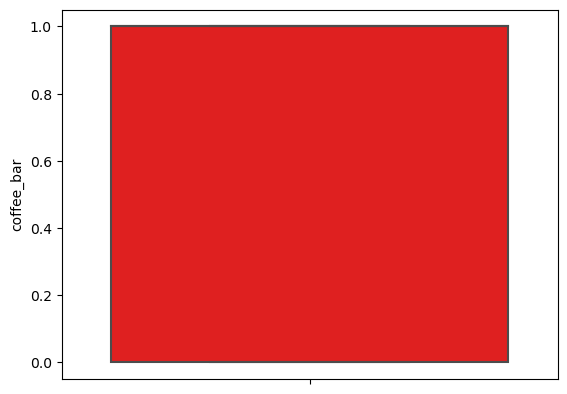

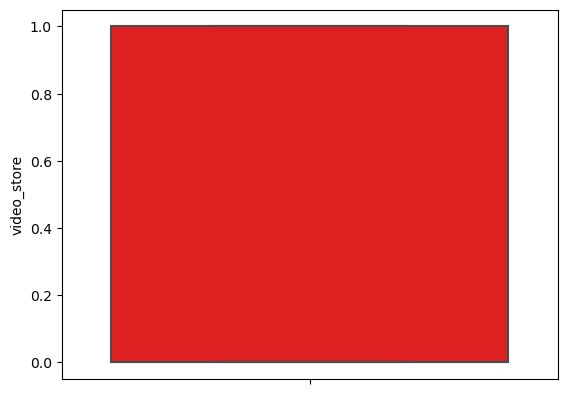

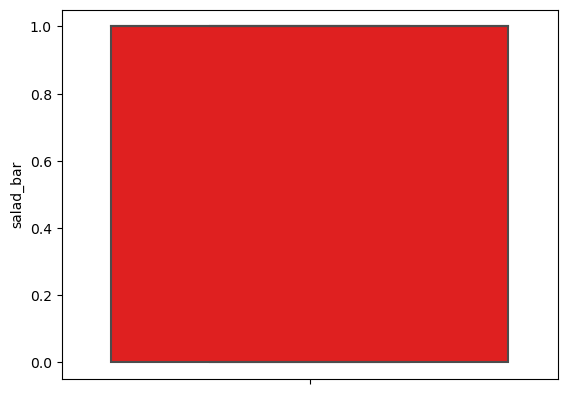

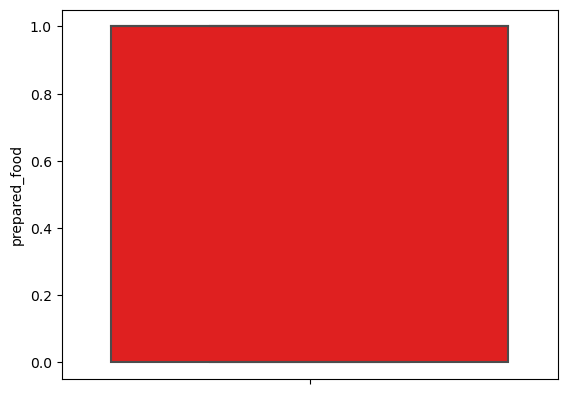

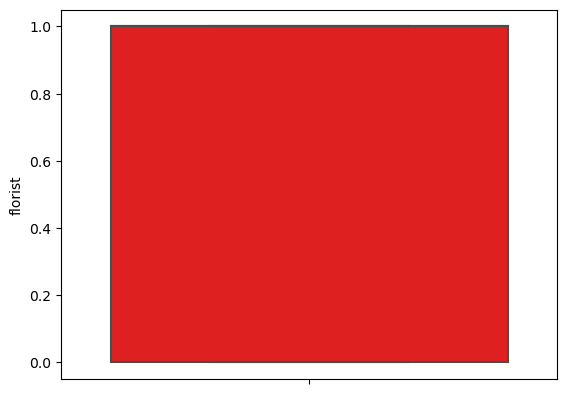

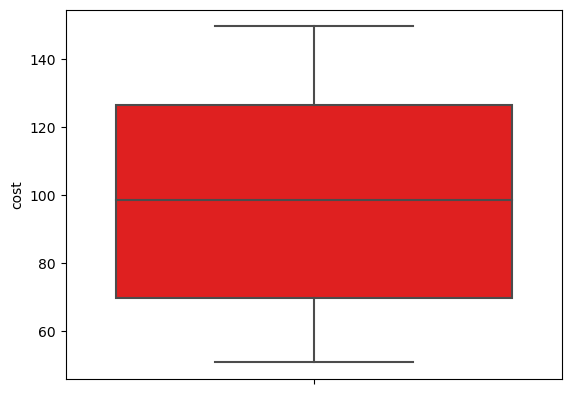

In [7]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [8]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL


for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

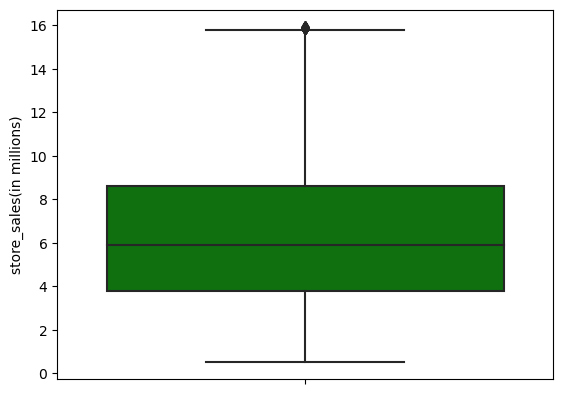

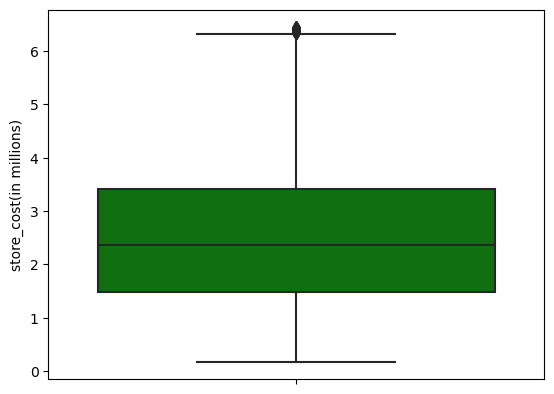

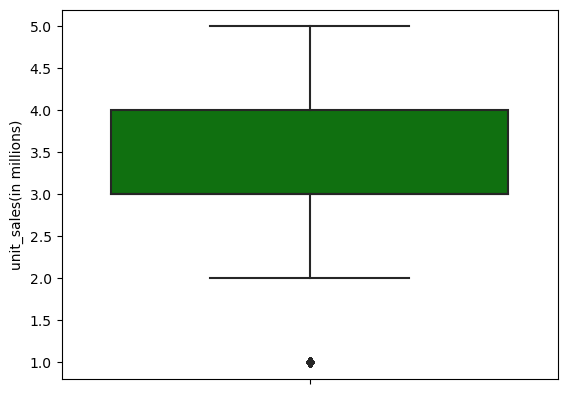

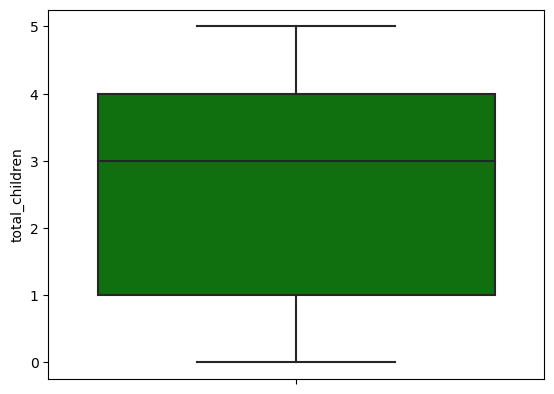

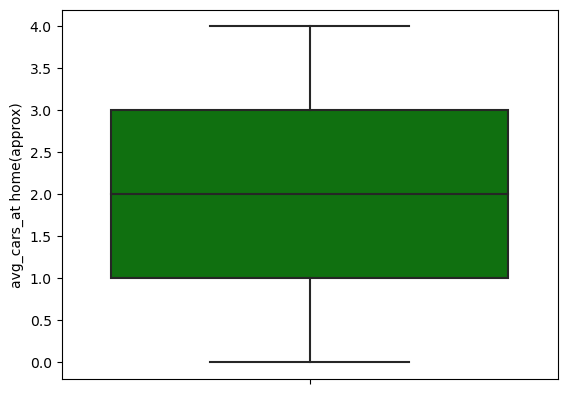

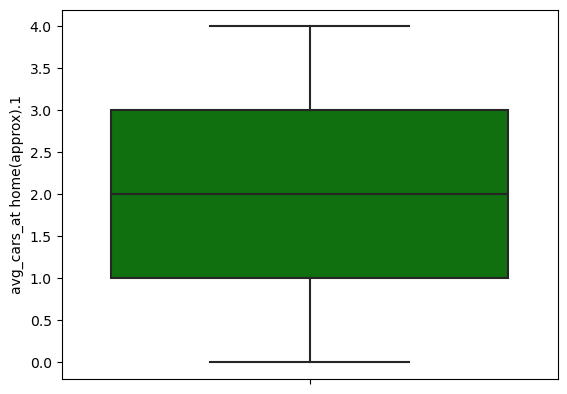

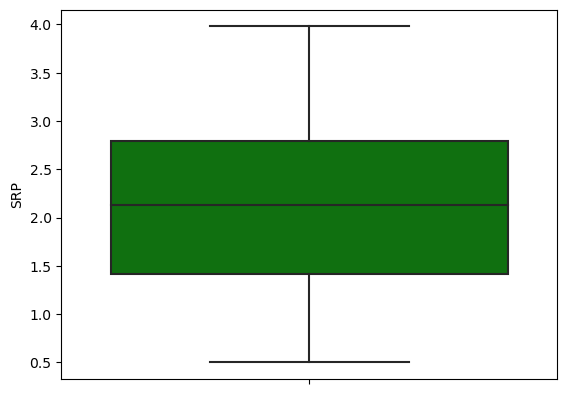

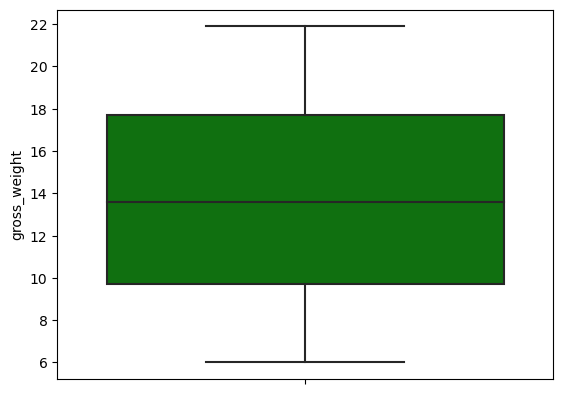

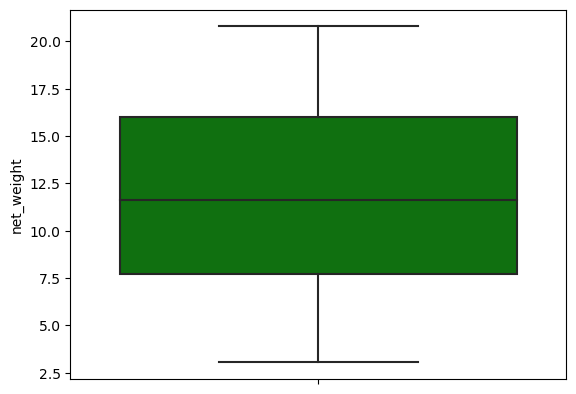

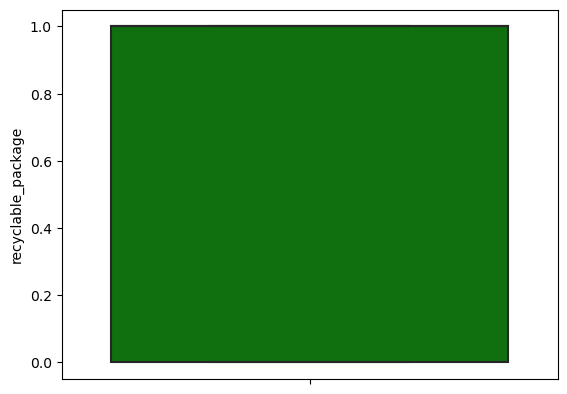

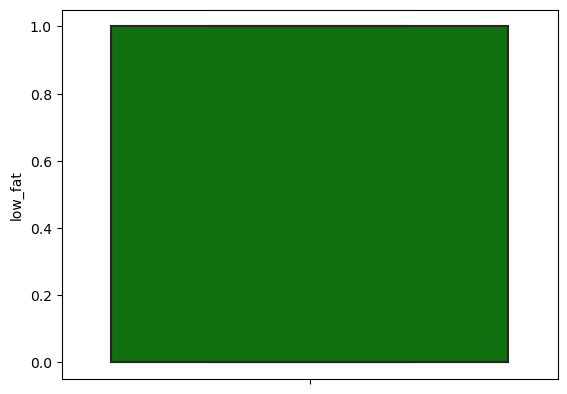

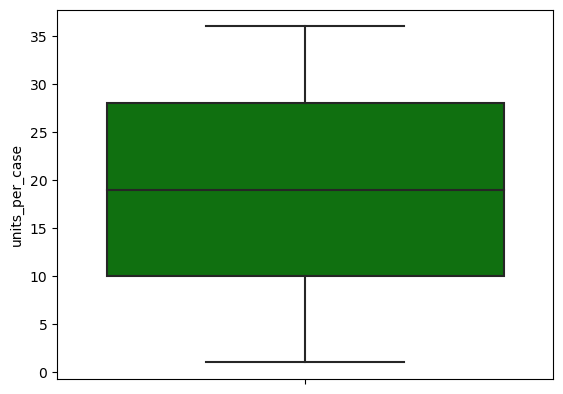

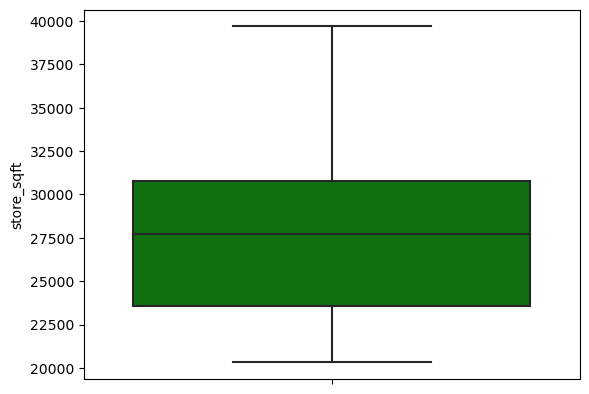

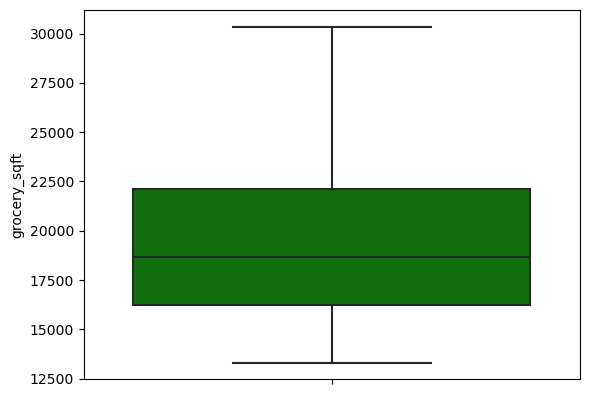

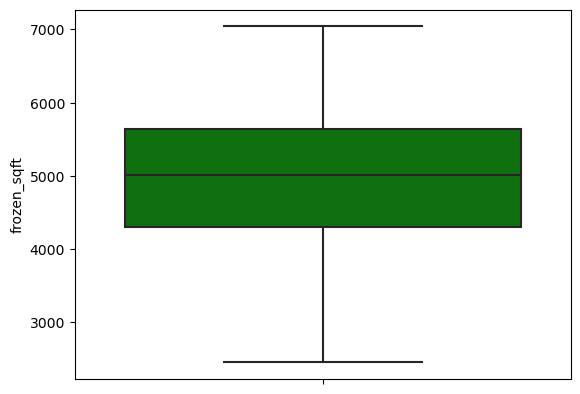

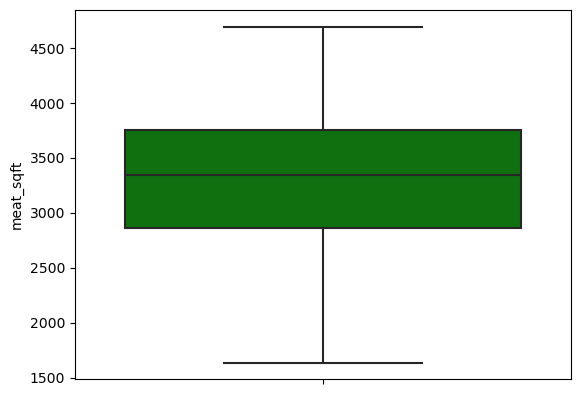

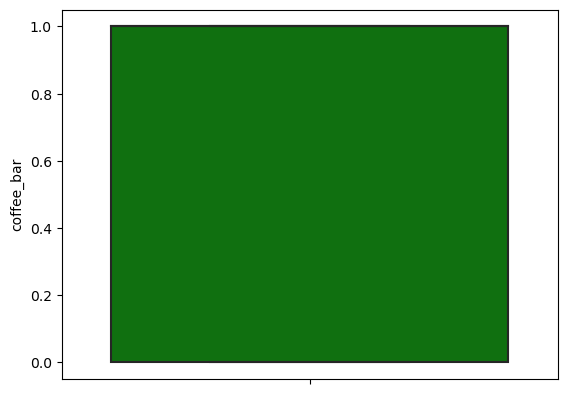

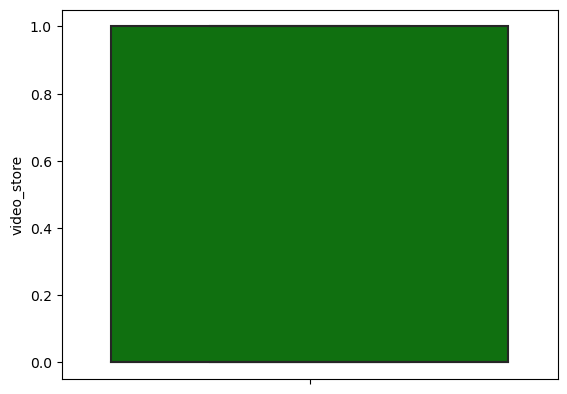

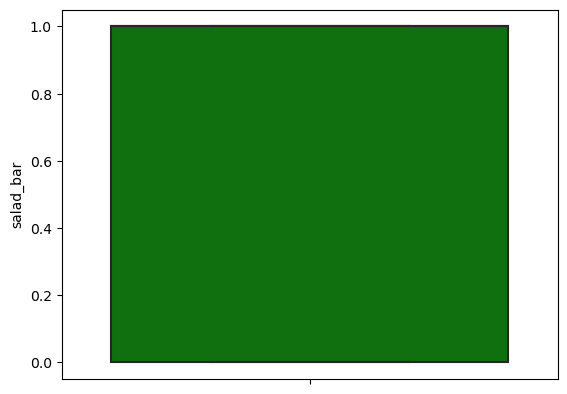

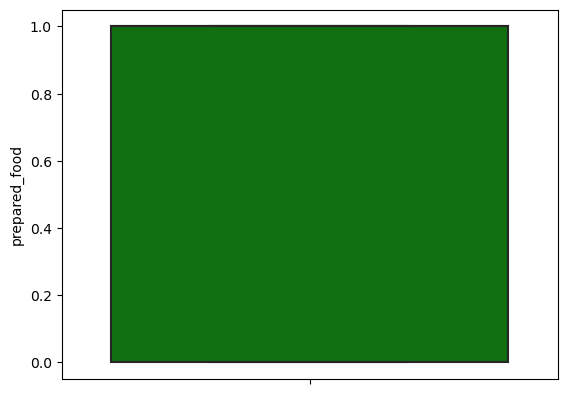

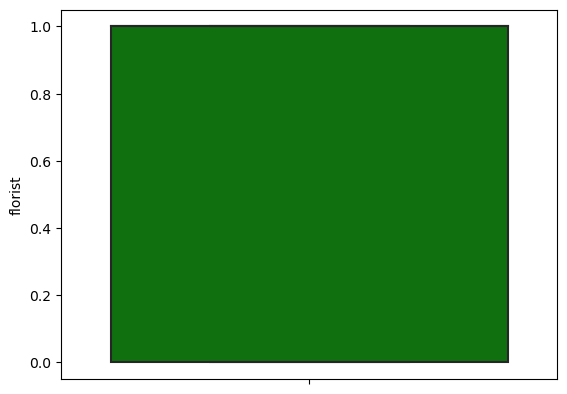

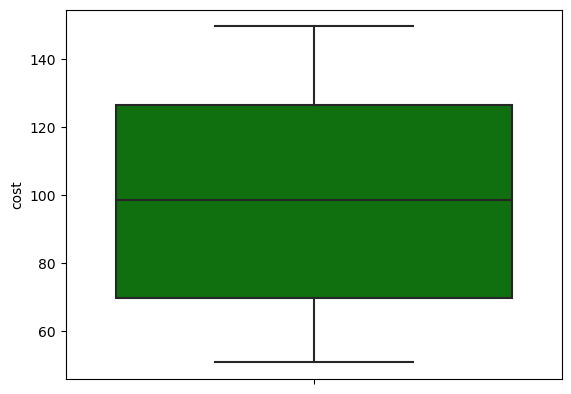

In [9]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="g")
        plt.show()

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54577 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               54577 non-null  object 
 1   food_department             54577 non-null  object 
 2   food_family                 54577 non-null  object 
 3   store_sales(in millions)    54577 non-null  float64
 4   store_cost(in millions)     54577 non-null  float64
 5   unit_sales(in millions)     54577 non-null  float64
 6   promotion_name              54577 non-null  object 
 7   sales_country               54577 non-null  object 
 8   marital_status              54577 non-null  object 
 9   gender                      54577 non-null  object 
 10  total_children              54577 non-null  float64
 11  education                   54577 non-null  object 
 12  member_card                 54577 non-null  object 
 13  occupation                  545

In [14]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])

In [15]:
df

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,4,12,1,7.36,2.7232,4.0,0,2,0,0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,3,126.62
1,4,12,1,5.52,2.5944,3.0,6,2,0,1,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,3,59.86
2,4,12,1,3.68,1.3616,2.0,18,2,1,0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,3,84.16
3,4,12,1,3.68,1.1776,2.0,6,2,0,0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,5,95.78
4,4,12,1,4.08,1.4280,3.0,11,2,0,1,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,7,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,42,7,2,2.76,1.3248,1.0,48,2,0,0,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,5,95.25
60424,42,7,2,1.60,0.4960,1.0,24,2,1,0,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,9,69.42
60425,42,7,2,5.52,2.5392,2.0,47,2,0,1,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,11,67.51
60426,42,7,2,8.28,2.5668,3.0,31,0,1,1,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,9,132.88


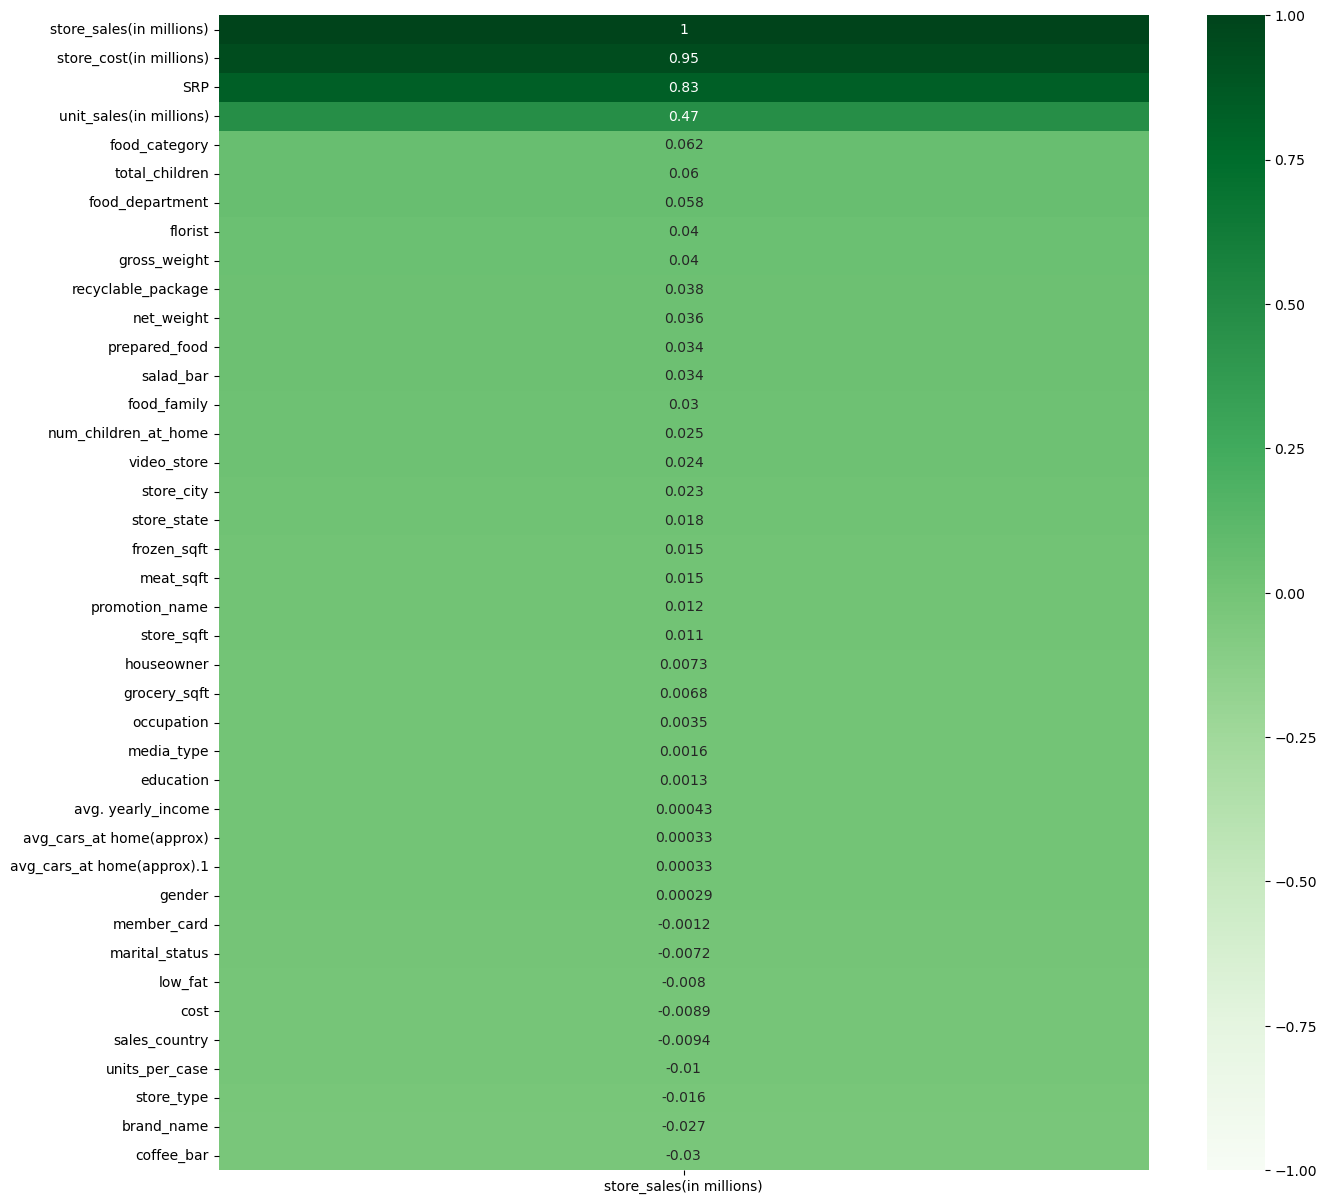

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr()[["store_sales(in millions)"]].sort_values(by="store_sales(in millions)", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54577 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               54577 non-null  int32  
 1   food_department             54577 non-null  int32  
 2   food_family                 54577 non-null  int32  
 3   store_sales(in millions)    54577 non-null  float64
 4   store_cost(in millions)     54577 non-null  float64
 5   unit_sales(in millions)     54577 non-null  float64
 6   promotion_name              54577 non-null  int32  
 7   sales_country               54577 non-null  int32  
 8   marital_status              54577 non-null  int32  
 9   gender                      54577 non-null  int32  
 10  total_children              54577 non-null  float64
 11  education                   54577 non-null  int32  
 12  member_card                 54577 non-null  int32  
 13  occupation                  545

In [20]:
x=df[["store_cost(in millions)","SRP","unit_sales(in millions)"]].values
y=df[["store_sales(in millions)"]].values

In [21]:
sc=StandardScaler()

In [22]:
x=sc.fit_transform(x)

In [23]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [24]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.6114954946534558
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  1.3988682202876388
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.6114954626848776
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  0.01666297892354116
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.32145114921576523
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  0.8413080353129571
********************************************

In [25]:
dtr=DecisionTreeRegressor()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [30]:
print("model trained with {}".format(dtr))
training_score = dtr.score(x_train, y_train)*100
testing_score = dtr.score(x_test, y_test)*100
score = r2_score(y_test, dtr.predict(x_test))*100
mae = mean_absolute_error(y_test, dtr.predict(x_test))
mse = mean_squared_error(y_test, dtr.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with DecisionTreeRegressor()
r2score:  99.9872059705344
training_score:  100.0
testing_score:  99.9872059705344
mae:  0.0014492488090885743
mse:  0.0013706852326859657
rmse_test:  0.0370227664104935


In [32]:
y_pred = dtr.predict(x)

In [33]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,7.36,7.36
1,5.52,5.52
2,3.68,3.68
3,3.68,3.68
4,4.08,4.08
...,...,...
54572,2.76,2.76
54573,1.60,1.60
54574,5.52,5.52
54575,8.28,8.28


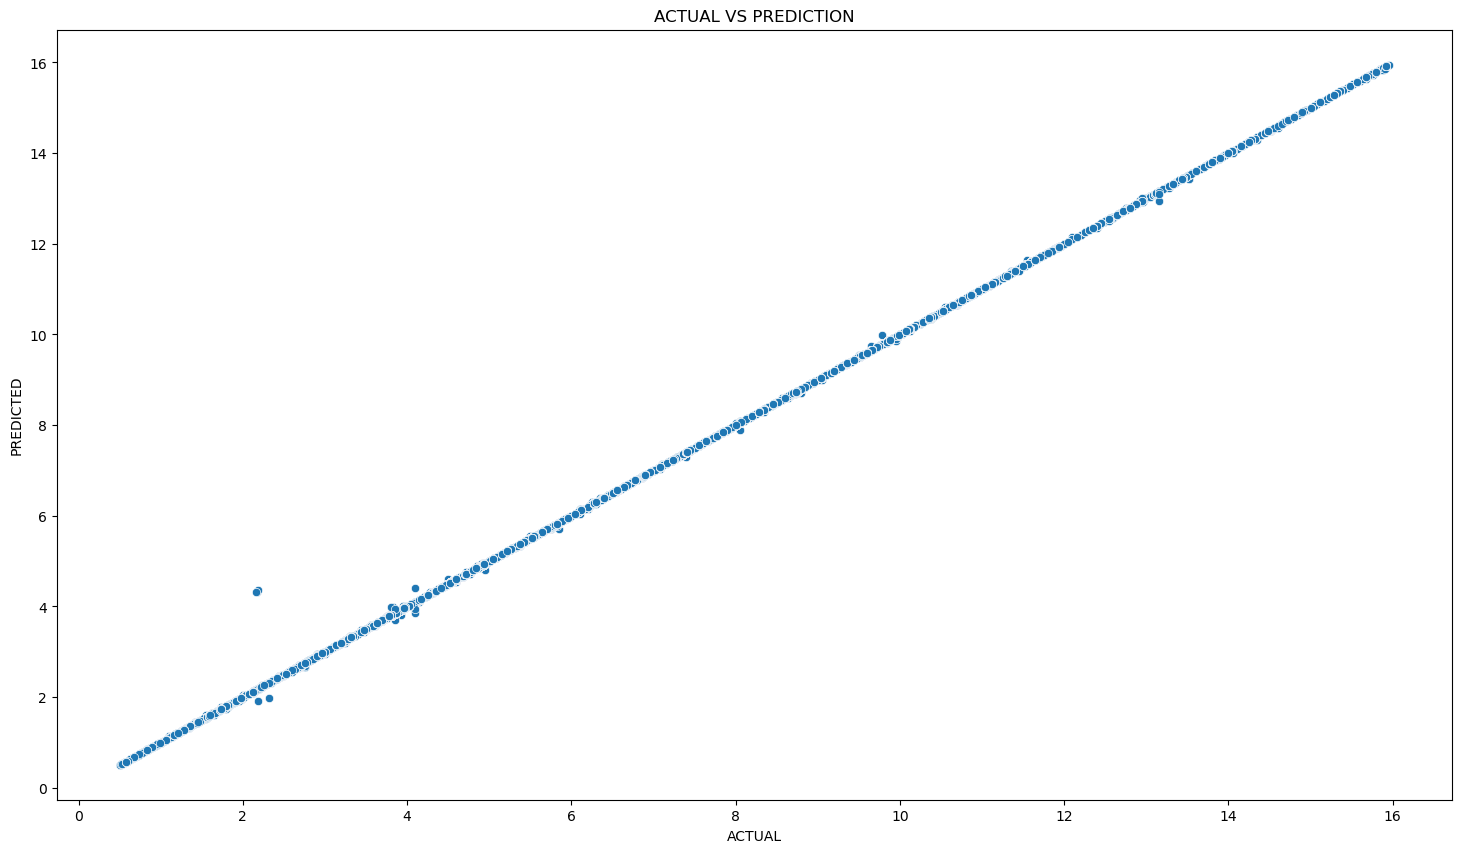

In [34]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()